In [2]:
import tensorflow

In [3]:
import keras

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train.shape
# 60000개의 이미지
# 사이즈 28*28

(60000, 28, 28)

In [8]:
X_train.reshape(-1)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [9]:
X_train.reshape([-1])

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

## 이미지 visualization

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

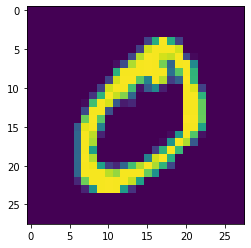

In [13]:
first_letter=X_train[1]
plt.imshow(first_letter)
#plt.show()

In [14]:
y_train.shape

(60000,)

In [15]:
y_train[1]

0

## Pre-processing
- X: 60000*28*28 -> 60000*784
- y: multiclass -> binary classs (5->1, 5x->0)

In [17]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [18]:
X_train.shape

(60000, 784)

In [19]:
X_test.shape

(10000, 784)

In [20]:
y_train_5 = (y_train==5) # y_train가 5이면 T 아니면 F
y_test_5 = (y_test==5) # y_test가 5이면 T 아니면 F

## Classification

- (X_train,y_train_5)학습
- (X_test) -> 예측

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf=SGDClassifier()

In [23]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier()

In [24]:
y_test[1] # test 데이터 셋의 첫번째 레이블 2이므로 5가 아님

2

In [25]:
sgd_clf.predict([X_test[1,]]) # 예측 값은 False (5가 아님)

array([False])

In [26]:
sgd_clf.predict(X_test) # 예측 값은 False (5가 아님)

array([False, False, False, ..., False,  True, False])

## Imbalanced classification

5- cross validation SGD linear model 의 정확도(accuracy) 평가

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.96891667, 0.96325   , 0.96141667, 0.96233333, 0.96333333])

In [28]:
from sklearn.base import BaseEstimator

In [29]:
import numpy as np

In [30]:
# fit 없이 무조건 0으로 prediction
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [31]:
never_5_clf=Never5Classifier()

In [32]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

### NOTE: class size 불균형이 심할 때는, classifciation accuracy 외에도 recall, precision, f1-score들을 참조 해야한다

## Confusion matrix

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)

In [35]:
## prediction -> confusion matrix
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_train_5,y_train_pred)

array([[53184,  1395],
       [ 1082,  4339]])

In [37]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [38]:
recall_score(y_train_5,y_train_pred)

0.8004058291828076

In [39]:
precision_score(y_train_5,y_train_pred)

0.7567143355423788

In [40]:
f1_score(y_train_5,y_train_pred)

0.7779471089197669

In [41]:
y_test[9998]

5

In [42]:
y_scores = sgd_clf.decision_function([X_test[9998,]])

In [43]:
y_scores

array([6028.17637883])

In [44]:
threshold=0
y_pred=(y_scores>threshold)

In [45]:
y_pred

array([ True])

In [46]:
threshold=300000
y_pred=(y_scores>threshold)

In [47]:
y_pred

array([False])

In [48]:
## threshold 커지면 음성, 작아지면 양성

In [49]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=5,method='decision_function')

In [50]:
y_scores

array([   -19.2160859 , -18080.85439677, -18302.25249205, ...,
         4852.21145701,  -5661.62015643,  -8395.68342841])

In [55]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

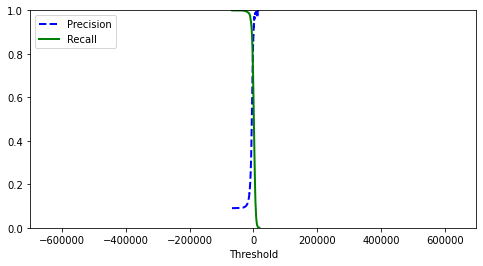

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [53]:
## recall 과 precision 이 서로 상충관계에 있다
## 적절한 임계값은 그때그때 달라요..

## ROC 곡선

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr, thresholds=roc_curve(y_train_5,y_scores)

In [59]:
fpr # false positive rate

array([0.        , 0.        , 0.        , ..., 0.99904725, 0.99904725,
       1.        ])

In [60]:
tpr # true positive rate

array([0.00000000e+00, 1.84467810e-04, 5.53403431e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [61]:
thresholds

array([  18972.59862187,   18971.59862187,   13494.11110071, ...,
        -66495.28978107,  -66669.68589952, -101872.51968124])

In [62]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

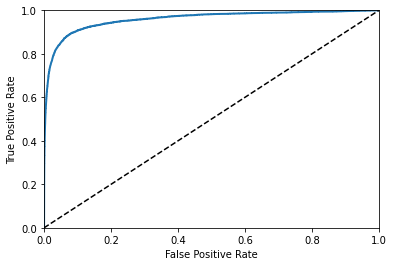

In [63]:
plot_roc_curve(fpr,tpr)

In [64]:
from sklearn.metrics import roc_auc_score

In [65]:
roc_auc_score(y_train_5,y_scores)

0.959233408169219

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
forest_clf=RandomForestClassifier(random_state=42)

In [68]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=5,method='predict_proba')

In [60]:
y_probas_forest # 0번재 칼럼->5가 아닐 확률, 1번째 칼럼-> 5일 확률

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [61]:
y_scores_forest=y_probas_forest[:,1] # 1번째 칼럼을 score로 쓴다

In [62]:
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5,y_scores_forest)

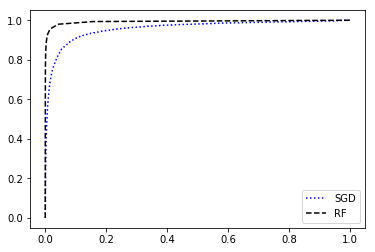

In [63]:
plt.plot(fpr,tpr,'b:',label='SGD') # SGD ROC 
plt.plot(fpr_forest,tpr_forest,'k--',label='RF') # RF ROC 
plt.legend(loc='lower right')

In [64]:
roc_auc_score(y_train_5,y_scores_forest)

0.9933511587661912

## Multiclass classification

In [65]:
# 5 vs. 5가 아닌것으로만 분류 했는데,
# 10개의 클래스를 모두 고려

In [66]:
sgd_clf.fit(X_train,y_train) # 10개 클래스로 학습 (학습데이터 이용) - One-vs-Rest 방법을 이용

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
sgd_clf.predict([X_test[1,:]])

array([2], dtype=uint8)

In [68]:
y_test[1]

2

One-vs-Rest 방법을 이용하기 때문에 condifence score 산출

In [69]:
confidence_score=sgd_clf.decision_function([X_test[1,:]])

In [70]:
confidence_score

array([[ -431766.94689943,  -570887.07861403,   210298.010554  ,
         -283419.34668815, -1387170.26344681,  -212067.96268181,
         -321855.69865486, -1401043.32414918,  -456020.71424336,
        -1240116.48243677]])

In [71]:
np.argmax(confidence_score)

2

## One-vs-One 방법을 쓰고싶다...

In [72]:
from sklearn.multiclass import OneVsOneClassifier

In [73]:
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

In [74]:
ovo_clf.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [75]:
ovo_clf.predict([X_test[1,:]])

array([2], dtype=uint8)

In [76]:
type(ovo_clf.estimators_)

tuple

In [77]:
len(ovo_clf.estimators_)

45

## Random forest 는 OvsR, OvsO 이런 거 안 써도 된다..

In [78]:
forest_clf.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [79]:
forest_clf.predict([X_test[1,:]])

array([2], dtype=uint8)

## SGD classifier 의 classification performance? accuracy

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=5,scoring='accuracy')

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler() # (x-mu)/std

In [83]:
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))

In [84]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=5,scoring='accuracy')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.91162016, 0.90559907, 0.90841667, 0.90564308, 0.91605535])

## Error analysis

In [70]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)

NameError: name 'X_train_scaled' is not defined

In [95]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [96]:
conf_mx

array([[5719,    2,   26,   10,   11,   51,   48,    7,   44,    5],
       [   1, 6452,   51,   24,    6,   46,    7,   10,  134,   11],
       [  52,   38, 5344,  102,   78,   27,   85,   57,  160,   15],
       [  44,   38,  130, 5357,    3,  232,   34,   59,  136,   98],
       [  20,   27,   36,    9, 5345,   11,   59,   34,   89,  212],
       [  65,   38,   35,  194,   82, 4586,  113,   28,  181,   99],
       [  30,   22,   44,    2,   38,   88, 5637,    5,   52,    0],
       [  21,   21,   73,   28,   60,   10,    6, 5804,   15,  227],
       [  46,  149,   65,  151,   14,  157,   56,   33, 5044,  136],
       [  40,   32,   31,   82,  157,   35,    2,  197,   89, 5284]])

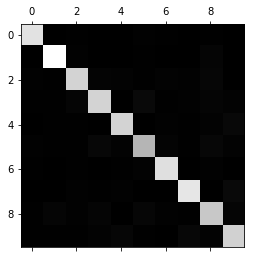

In [97]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [89]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [90]:
norm_conf_mx

array([[9.64207327e-01, 3.37666723e-04, 4.05200068e-03, 1.68833361e-03,
        1.85716698e-03, 9.62350160e-03, 7.93516799e-03, 1.85716698e-03,
        7.76633463e-03, 6.75333446e-04],
       [1.48323939e-04, 9.59507565e-01, 6.08128152e-03, 3.85642243e-03,
        8.89943637e-04, 6.52625334e-03, 8.89943637e-04, 1.63156333e-03,
        1.88371403e-02, 1.63156333e-03],
       [8.39207788e-03, 6.71366230e-03, 8.95770393e-01, 1.66163142e-02,
        1.22524337e-02, 4.02819738e-03, 1.46022155e-02, 9.39912722e-03,
        2.97079557e-02, 2.51762336e-03],
       [7.33974882e-03, 7.50285435e-03, 2.34871962e-02, 8.68373838e-01,
        1.63105529e-04, 3.81666939e-02, 6.36111564e-03, 8.80769858e-03,
        2.39765128e-02, 1.58212363e-02],
       [3.42348511e-03, 4.45053064e-03, 6.50462170e-03, 1.71174255e-03,
        9.10647039e-01, 1.88291681e-03, 9.24340979e-03, 6.50462170e-03,
        1.71174255e-02, 3.85142075e-02],
       [1.25438111e-02, 7.93211585e-03, 5.90296993e-03, 3.44954805e-02,
   

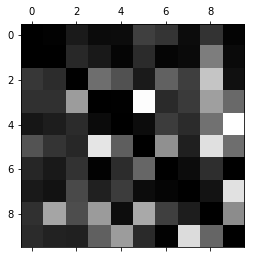

In [91]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [98]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

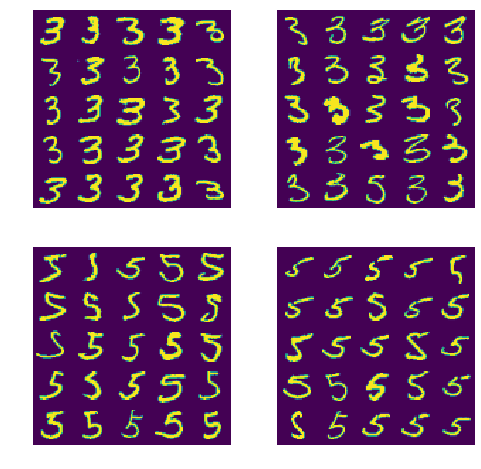

In [99]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

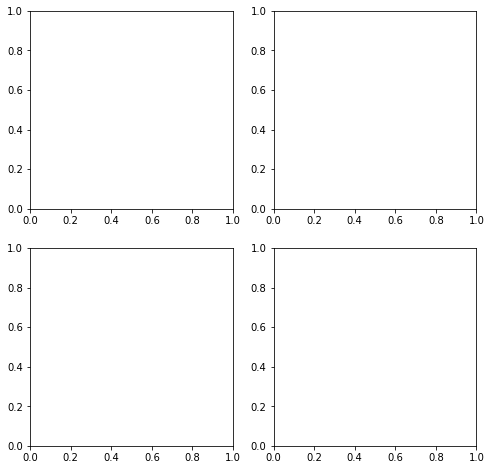

In [69]:
cl_a, cl_b = 4, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))

plt.subplot(221); #plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); #plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); #plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); #plot_digits(X_bb[:25], images_per_row=5)
plt.show()